### Par 1 German

In [1]:
from scipy.io import arff
import pandas as pd
from GAN import GAN
from GAN_Twist import GAN_RF
from Dataset import Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
original_df = pd.DataFrame(data[0])
original_df

1     2       3       4       5       6       7    8       9  \
0    b'A11'   6.0  b'A34'  b'A43'  1169.0  b'A65'  b'A75'  4.0  b'A93'   
1    b'A12'  48.0  b'A32'  b'A43'  5951.0  b'A61'  b'A73'  2.0  b'A92'   
2    b'A14'  12.0  b'A34'  b'A46'  2096.0  b'A61'  b'A74'  2.0  b'A93'   
3    b'A11'  42.0  b'A32'  b'A42'  7882.0  b'A61'  b'A74'  2.0  b'A93'   
4    b'A11'  24.0  b'A33'  b'A40'  4870.0  b'A61'  b'A73'  3.0  b'A93'   
..      ...   ...     ...     ...     ...     ...     ...  ...     ...   
995  b'A14'  12.0  b'A32'  b'A42'  1736.0  b'A61'  b'A74'  3.0  b'A92'   
996  b'A11'  30.0  b'A32'  b'A41'  3857.0  b'A61'  b'A73'  4.0  b'A91'   
997  b'A14'  12.0  b'A32'  b'A43'   804.0  b'A61'  b'A75'  4.0  b'A93'   
998  b'A11'  45.0  b'A32'  b'A43'  1845.0  b'A61'  b'A73'  4.0  b'A93'   
999  b'A12'  45.0  b'A34'  b'A41'  4576.0  b'A62'  b'A71'  3.0  b'A93'   

          10  ...       12    13       14       15   16       17   18  \
0    b'A101'  ...  b'A121'  67.0  b'A143'  b'A152'  2.0  b'A173'  1.0   
1    b'A101'  ...  b'A121'  22.0  b'A143'  b'A152'  1.0  b'A173'  1.0   
2    b'A101'  ...  b'A121'  49.0  b'A143'  b'A152'  1.0  b'A172'  2.0   
3    b'A103'  ...  b'A122'  45.0  b'A143'  b'A153'  1.0  b'A173'  2.0   
4    b'A101'  ...  b'A124'  53.0  b'A143'  b'A153'  2.0  b'A173'  2.0   
..       ...  ...      ...   ...      ...      ...  ...      ...  ...   
995  b'A101'  ...  b'A121'  31.0  b'A143'  b'A152'  1.0  b'A172'  1.0   
996  b'A101'  ...  b'A122'  40.0  b'A143'  b'A152'  1.0  b'A174'  1.0   
997  b'A101'  ...  b'A123'  38.0  b'A143'  b'A152'  1.0  b'A173'  1.0   
998  b'A101'  ...  b'A124'  23.0  b'A143'  b'A153'  1.0  b'A173'  1.0   
999  b'A101'  ...  b'A123'  27.0  b'A143'  b'A152'  1.0  b'A173'  1.0   

          19       20    21  
0    b'A192'  b'A201'  b'1'  
1    b'A191'  b'A201'  b'2'  
2    b'A191'  b'A201'  b'1'  
3    b'A191'  b'A201'  b'1'  
4    b'A191'  b'A201'  b'2'  
..       ...      ...   ...  
995  b'A191'  b'A201'  b'1'  
996  b'A192'  b'A201'  b'1'  
997  b'A191'  b'A201'  b'1'  
998  b'A192'  b'A201'  b'2'  
999  b'A191'  b'A201'  b'1'  

[1000 rows x 21 columns]

In [3]:
columns = original_df.columns

In [4]:
import re
for column in columns:
    if original_df[column].dtype == object:
        original_df[column] = original_df[column].apply(lambda x: x.decode("utf-8"))

In [5]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
df = pd.DataFrame(data[0])
df

1     2       3       4       5       6       7    8       9  \
0    b'A11'   6.0  b'A34'  b'A43'  1169.0  b'A65'  b'A75'  4.0  b'A93'   
1    b'A12'  48.0  b'A32'  b'A43'  5951.0  b'A61'  b'A73'  2.0  b'A92'   
2    b'A14'  12.0  b'A34'  b'A46'  2096.0  b'A61'  b'A74'  2.0  b'A93'   
3    b'A11'  42.0  b'A32'  b'A42'  7882.0  b'A61'  b'A74'  2.0  b'A93'   
4    b'A11'  24.0  b'A33'  b'A40'  4870.0  b'A61'  b'A73'  3.0  b'A93'   
..      ...   ...     ...     ...     ...     ...     ...  ...     ...   
995  b'A14'  12.0  b'A32'  b'A42'  1736.0  b'A61'  b'A74'  3.0  b'A92'   
996  b'A11'  30.0  b'A32'  b'A41'  3857.0  b'A61'  b'A73'  4.0  b'A91'   
997  b'A14'  12.0  b'A32'  b'A43'   804.0  b'A61'  b'A75'  4.0  b'A93'   
998  b'A11'  45.0  b'A32'  b'A43'  1845.0  b'A61'  b'A73'  4.0  b'A93'   
999  b'A12'  45.0  b'A34'  b'A41'  4576.0  b'A62'  b'A71'  3.0  b'A93'   

          10  ...       12    13       14       15   16       17   18  \
0    b'A101'  ...  b'A121'  67.0  b'A143'  b'A152'  2.0  b'A173'  1.0   
1    b'A101'  ...  b'A121'  22.0  b'A143'  b'A152'  1.0  b'A173'  1.0   
2    b'A101'  ...  b'A121'  49.0  b'A143'  b'A152'  1.0  b'A172'  2.0   
3    b'A103'  ...  b'A122'  45.0  b'A143'  b'A153'  1.0  b'A173'  2.0   
4    b'A101'  ...  b'A124'  53.0  b'A143'  b'A153'  2.0  b'A173'  2.0   
..       ...  ...      ...   ...      ...      ...  ...      ...  ...   
995  b'A101'  ...  b'A121'  31.0  b'A143'  b'A152'  1.0  b'A172'  1.0   
996  b'A101'  ...  b'A122'  40.0  b'A143'  b'A152'  1.0  b'A174'  1.0   
997  b'A101'  ...  b'A123'  38.0  b'A143'  b'A152'  1.0  b'A173'  1.0   
998  b'A101'  ...  b'A124'  23.0  b'A143'  b'A153'  1.0  b'A173'  1.0   
999  b'A101'  ...  b'A123'  27.0  b'A143'  b'A152'  1.0  b'A173'  1.0   

          19       20    21  
0    b'A192'  b'A201'  b'1'  
1    b'A191'  b'A201'  b'2'  
2    b'A191'  b'A201'  b'1'  
3    b'A191'  b'A201'  b'1'  
4    b'A191'  b'A201'  b'2'  
..       ...      ...   ...  
995  b'A191'  b'A201'  b'1'  
996  b'A192'  b'A201'  b'1'  
997  b'A191'  b'A201'  b'1'  
998  b'A192'  b'A201'  b'2'  
999  b'A191'  b'A201'  b'1'  

[1000 rows x 21 columns]

In [6]:
columns = df.columns

In [7]:
import re
for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode("utf-8"))
        df[column] = df[column].apply(lambda v: int(re.findall('[0-9]+', v)[0]))

In [8]:
df

1     2   3   4       5   6   7    8   9   10  ...   12    13   14   15  \
0    11   6.0  34  43  1169.0  65  75  4.0  93  101  ...  121  67.0  143  152   
1    12  48.0  32  43  5951.0  61  73  2.0  92  101  ...  121  22.0  143  152   
2    14  12.0  34  46  2096.0  61  74  2.0  93  101  ...  121  49.0  143  152   
3    11  42.0  32  42  7882.0  61  74  2.0  93  103  ...  122  45.0  143  153   
4    11  24.0  33  40  4870.0  61  73  3.0  93  101  ...  124  53.0  143  153   
..   ..   ...  ..  ..     ...  ..  ..  ...  ..  ...  ...  ...   ...  ...  ...   
995  14  12.0  32  42  1736.0  61  74  3.0  92  101  ...  121  31.0  143  152   
996  11  30.0  32  41  3857.0  61  73  4.0  91  101  ...  122  40.0  143  152   
997  14  12.0  32  43   804.0  61  75  4.0  93  101  ...  123  38.0  143  152   
998  11  45.0  32  43  1845.0  61  73  4.0  93  101  ...  124  23.0  143  153   
999  12  45.0  34  41  4576.0  62  71  3.0  93  101  ...  123  27.0  143  152   

      16   17   18   19   20  21  
0    2.0  173  1.0  192  201   1  
1    1.0  173  1.0  191  201   2  
2    1.0  172  2.0  191  201   1  
3    1.0  173  2.0  191  201   1  
4    2.0  173  2.0  191  201   2  
..   ...  ...  ...  ...  ...  ..  
995  1.0  172  1.0  191  201   1  
996  1.0  174  1.0  192  201   1  
997  1.0  173  1.0  191  201   1  
998  1.0  173  1.0  192  201   2  
999  1.0  173  1.0  191  201   1  

[1000 rows x 21 columns]

In [9]:

# class_col = df['21']
# df = df.drop(columns=['21'], axis=1)
scaler = MinMaxScaler((-1, 1))
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
# df = pd.concat([df, class_col],axis=1)
df

1         2    3         4         5    6    7         8  \
0   -1.000000 -0.941176  1.0 -0.983784 -0.898867  1.0  1.0  1.000000   
1   -0.333333  0.294118  0.0 -0.983784 -0.372620 -1.0  0.0 -0.333333   
2    1.000000 -0.764706  1.0 -0.967568 -0.796853 -1.0  0.5 -0.333333   
3   -1.000000  0.117647  0.0 -0.989189 -0.160119 -1.0  0.5 -0.333333   
4   -1.000000 -0.411765  0.5 -1.000000 -0.491581 -1.0  0.0  0.333333   
..        ...       ...  ...       ...       ...  ...  ...       ...   
995  1.000000 -0.764706  0.0 -0.989189 -0.836470 -1.0  0.5  0.333333   
996 -1.000000 -0.235294  0.0 -0.994595 -0.603059 -1.0  0.0  1.000000   
997  1.000000 -0.764706  0.0 -0.983784 -0.939034 -1.0  1.0  1.000000   
998 -1.000000  0.205882  0.0 -0.983784 -0.824475 -1.0  0.0  1.000000   
999 -0.333333  0.205882  1.0 -0.994595 -0.523935 -0.5 -1.0  0.333333   

            9   10  ...        12        13   14   15        16        17  \
0    0.333333 -1.0  ... -1.000000  0.714286  1.0  0.0 -0.333333  0.333333   
1   -0.333333 -1.0  ... -1.000000 -0.892857  1.0  0.0 -1.000000  0.333333   
2    0.333333 -1.0  ... -1.000000  0.071429  1.0  0.0 -1.000000 -0.333333   
3    0.333333  1.0  ... -0.333333 -0.071429  1.0  1.0 -1.000000  0.333333   
4    0.333333 -1.0  ...  1.000000  0.214286  1.0  1.0 -0.333333  0.333333   
..        ...  ...  ...       ...       ...  ...  ...       ...       ...   
995 -0.333333 -1.0  ... -1.000000 -0.571429  1.0  0.0 -1.000000 -0.333333   
996 -1.000000 -1.0  ... -0.333333 -0.250000  1.0  0.0 -1.000000  1.000000   
997  0.333333 -1.0  ...  0.333333 -0.321429  1.0  0.0 -1.000000  0.333333   
998  0.333333 -1.0  ...  1.000000 -0.857143  1.0  1.0 -1.000000  0.333333   
999  0.333333 -1.0  ...  0.333333 -0.714286  1.0  0.0 -1.000000  0.333333   

      18   19   20   21  
0   -1.0  1.0 -1.0 -1.0  
1   -1.0 -1.0 -1.0  1.0  
2    1.0 -1.0 -1.0 -1.0  
3    1.0 -1.0 -1.0 -1.0  
4    1.0 -1.0 -1.0  1.0  
..   ...  ...  ...  ...  
995 -1.0 -1.0 -1.0 -1.0  
996 -1.0  1.0 -1.0 -1.0  
997 -1.0 -1.0 -1.0 -1.0  
998 -1.0  1.0 -1.0  1.0  
999 -1.0 -1.0 -1.0 -1.0  

[1000 rows x 21 columns]

In [10]:
import re

In [11]:
#Define the GAN and training parameters
noise_dim = 5
dim = 21
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir= 'model_credit'

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = [models_dir, epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

0 [D loss: 0.677925, acc.: 54.69%] [G loss: 0.688974]
generated_data
100 [D loss: 0.712260, acc.: 48.44%] [G loss: 0.738299]
generated_data
200 [D loss: 0.562285, acc.: 76.56%] [G loss: 0.801109]
generated_data
300 [D loss: 0.830180, acc.: 37.50%] [G loss: 0.742674]
generated_data
400 [D loss: 0.614144, acc.: 68.75%] [G loss: 0.828593]
generated_data
500 [D loss: 0.678801, acc.: 60.94%] [G loss: 0.965478]
generated_data
600 [D loss: 0.488754, acc.: 82.81%] [G loss: 1.061183]
generated_data
700 [D loss: 0.614315, acc.: 60.94%] [G loss: 0.874835]
generated_data
800 [D loss: 0.601119, acc.: 64.06%] [G loss: 0.792555]
generated_data
900 [D loss: 0.577527, acc.: 75.00%] [G loss: 0.956712]
generated_data
1000 [D loss: 0.662415, acc.: 56.25%] [G loss: 0.988008]
generated_data
1100 [D loss: 0.497487, acc.: 82.81%] [G loss: 1.064598]
generated_data
1200 [D loss: 0.543377, acc.: 82.81%] [G loss: 0.897177]
generated_data
1300 [D loss: 0.509225, acc.: 79.69%] [G loss: 1.033629]
generated_data
1400

In [12]:
from sklearn.decomposition import PCA

In [13]:
df

1         2    3         4         5    6    7         8  \
0   -1.000000 -0.941176  1.0 -0.983784 -0.898867  1.0  1.0  1.000000   
1   -0.333333  0.294118  0.0 -0.983784 -0.372620 -1.0  0.0 -0.333333   
2    1.000000 -0.764706  1.0 -0.967568 -0.796853 -1.0  0.5 -0.333333   
3   -1.000000  0.117647  0.0 -0.989189 -0.160119 -1.0  0.5 -0.333333   
4   -1.000000 -0.411765  0.5 -1.000000 -0.491581 -1.0  0.0  0.333333   
..        ...       ...  ...       ...       ...  ...  ...       ...   
995  1.000000 -0.764706  0.0 -0.989189 -0.836470 -1.0  0.5  0.333333   
996 -1.000000 -0.235294  0.0 -0.994595 -0.603059 -1.0  0.0  1.000000   
997  1.000000 -0.764706  0.0 -0.983784 -0.939034 -1.0  1.0  1.000000   
998 -1.000000  0.205882  0.0 -0.983784 -0.824475 -1.0  0.0  1.000000   
999 -0.333333  0.205882  1.0 -0.994595 -0.523935 -0.5 -1.0  0.333333   

            9   10  ...        12        13   14   15        16        17  \
0    0.333333 -1.0  ... -1.000000  0.714286  1.0  0.0 -0.333333  0.333333   
1   -0.333333 -1.0  ... -1.000000 -0.892857  1.0  0.0 -1.000000  0.333333   
2    0.333333 -1.0  ... -1.000000  0.071429  1.0  0.0 -1.000000 -0.333333   
3    0.333333  1.0  ... -0.333333 -0.071429  1.0  1.0 -1.000000  0.333333   
4    0.333333 -1.0  ...  1.000000  0.214286  1.0  1.0 -0.333333  0.333333   
..        ...  ...  ...       ...       ...  ...  ...       ...       ...   
995 -0.333333 -1.0  ... -1.000000 -0.571429  1.0  0.0 -1.000000 -0.333333   
996 -1.000000 -1.0  ... -0.333333 -0.250000  1.0  0.0 -1.000000  1.000000   
997  0.333333 -1.0  ...  0.333333 -0.321429  1.0  0.0 -1.000000  0.333333   
998  0.333333 -1.0  ...  1.000000 -0.857143  1.0  1.0 -1.000000  0.333333   
999  0.333333 -1.0  ...  0.333333 -0.714286  1.0  0.0 -1.000000  0.333333   

      18   19   20   21  
0   -1.0  1.0 -1.0 -1.0  
1   -1.0 -1.0 -1.0  1.0  
2    1.0 -1.0 -1.0 -1.0  
3    1.0 -1.0 -1.0 -1.0  
4    1.0 -1.0 -1.0  1.0  
..   ...  ...  ...  ...  
995 -1.0 -1.0 -1.0 -1.0  
996 -1.0  1.0 -1.0 -1.0  
997 -1.0 -1.0 -1.0 -1.0  
998 -1.0  1.0 -1.0  1.0  
999 -1.0 -1.0 -1.0 -1.0  

[1000 rows x 21 columns]

In [14]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [15]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [16]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

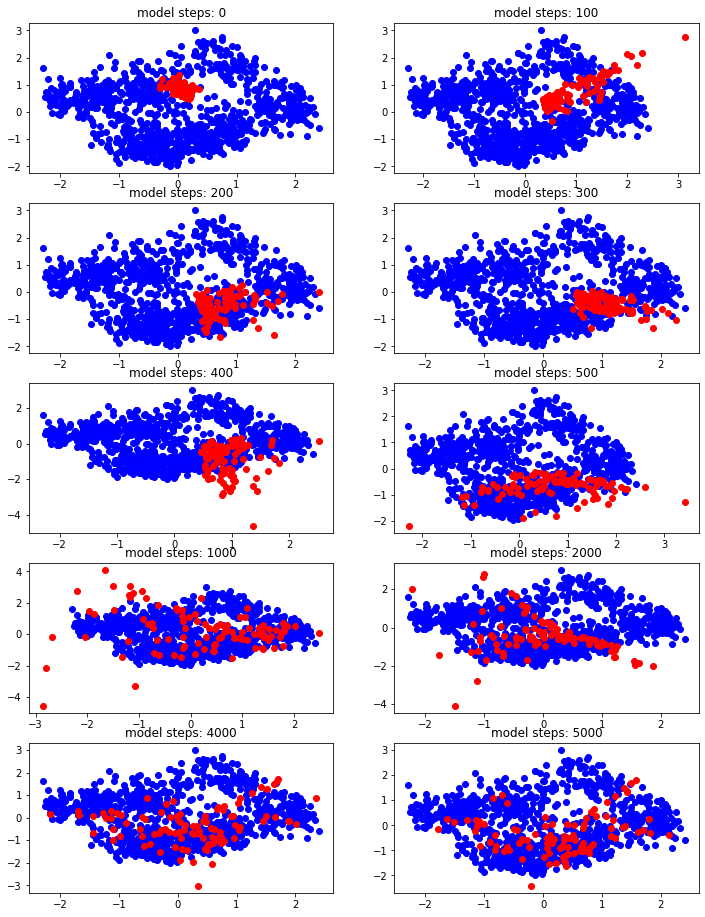

In [17]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + 'model_credit_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [18]:
A_columns = original_df.columns[original_df.dtypes == object][:-1]

In [19]:
A_columns

Index(['1', '3', '4', '6', '7', '9', '10', '12', '14', '15', '17', '19', '20'], dtype='object')

In [20]:
fooled_samples = scaler.inverse_transform(g_z)
generated_df = pd.DataFrame(fooled_samples)
# generated_df['20'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df['21'] = generated_df['21'].apply(lambda v: 2 if v >= 1.5 else 1)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
for a_column in A_columns:
    generated_df[a_column] = generated_df[a_column].apply(lambda v: f'A{int(v)}')
generated_df

1     2    3     4       5    6    7    8    9    10  ...    13    14  \
0   A12  49.0  A32    A0  6668.0  A62  A76  3.0  A93  A101  ...  18.0  A144   
1   A14  12.0  A34   A32  1054.0  A61  A72  4.0  A92  A101  ...  33.0  A143   
2   A14   2.0  A34   A33   169.0  A61  A72  4.0  A92  A101  ...  28.0  A143   
3   A13  26.0  A32   A99  5928.0  A63  A74  2.0  A93  A101  ...  40.0  A142   
4   A13  29.0  A33  A105  6217.0  A62  A73  3.0  A93  A102  ...  36.0  A142   
..  ...   ...  ...   ...     ...  ...  ...  ...  ...   ...  ...   ...   ...   
95  A13  22.0  A32   A79  5362.0  A62  A73  3.0  A93  A101  ...  47.0  A143   
96  A12  57.0  A33    A9  7628.0  A60  A76  4.0  A93  A101  ...  53.0  A143   
97  A12  50.0  A33   A43  7294.0  A61  A75  4.0  A93  A101  ...  49.0  A143   
98  A12   0.0  A36    A0     0.0  A61  A72  5.0  A93  A101  ...  14.0  A144   
99  A12  18.0  A33   A32  5522.0  A61  A74  2.0  A93  A101  ...  41.0  A143   

      15   16    17   18    19    20 21 discriminator  
0   A152  0.0  A173  1.0  A191  A201  2             0  
1   A152  2.0  A174  1.0  A191  A201  1             0  
2   A152  2.0  A175  1.0  A191  A201  1             0  
3   A152  2.0  A173  1.0  A191  A201  1             0  
4   A152  2.0  A173  1.0  A191  A201  1             0  
..   ...  ...   ...  ...   ...   ... ..           ...  
95  A152  1.0  A173  1.0  A191  A201  1             0  
96  A153  1.0  A173  1.0  A191  A201  2             0  
97  A153  1.0  A173  1.0  A191  A201  2             0  
98  A152 -0.0  A174  1.0  A191  A201  1             0  
99  A152  1.0  A173  1.0  A191  A201  1             0  

[100 rows x 22 columns]

In [21]:
fooled_samples[:, -1]

array([2.291408  , 1.094711  , 0.85622704, 1.1856418 , 1.1607621 ,
       1.028375  , 1.8007082 , 0.79090595, 0.7442776 , 1.0495183 ,
       1.5120679 , 1.1267061 , 0.70989263, 2.1506386 , 1.5931946 ,
       2.1956365 , 1.0474219 , 0.7551854 , 1.1593176 , 0.99261564,
       1.6692114 , 0.88630813, 1.0380722 , 1.3907824 , 1.1630023 ,
       1.0650063 , 1.0910819 , 0.910815  , 1.0179899 , 1.7462883 ,
       2.0417676 , 0.9686998 , 1.1168015 , 1.9817849 , 1.9383441 ,
       1.0575209 , 2.106289  , 0.803303  , 1.1652613 , 0.8340135 ,
       0.9198394 , 2.2710795 , 1.038673  , 0.8880466 , 0.95906633,
       0.97089505, 0.87326753, 1.1844261 , 1.7696266 , 0.8777535 ,
       1.2016326 , 0.8896161 , 1.4559782 , 2.013315  , 1.3323427 ,
       0.97083473, 0.99908245, 0.90873635, 1.0377958 , 0.78685033,
       1.6050488 , 1.1508977 , 1.0111959 , 0.96698785, 0.9851636 ,
       1.0843515 , 1.8855302 , 1.2992773 , 0.9846011 , 1.2212532 ,
       0.9345286 , 0.86236537, 1.1497267 , 0.9571849 , 1.13262

In [22]:
original_df

1     2    3    4       5    6    7    8    9    10  ...    12    13  \
0    A11   6.0  A34  A43  1169.0  A65  A75  4.0  A93  A101  ...  A121  67.0   
1    A12  48.0  A32  A43  5951.0  A61  A73  2.0  A92  A101  ...  A121  22.0   
2    A14  12.0  A34  A46  2096.0  A61  A74  2.0  A93  A101  ...  A121  49.0   
3    A11  42.0  A32  A42  7882.0  A61  A74  2.0  A93  A103  ...  A122  45.0   
4    A11  24.0  A33  A40  4870.0  A61  A73  3.0  A93  A101  ...  A124  53.0   
..   ...   ...  ...  ...     ...  ...  ...  ...  ...   ...  ...   ...   ...   
995  A14  12.0  A32  A42  1736.0  A61  A74  3.0  A92  A101  ...  A121  31.0   
996  A11  30.0  A32  A41  3857.0  A61  A73  4.0  A91  A101  ...  A122  40.0   
997  A14  12.0  A32  A43   804.0  A61  A75  4.0  A93  A101  ...  A123  38.0   
998  A11  45.0  A32  A43  1845.0  A61  A73  4.0  A93  A101  ...  A124  23.0   
999  A12  45.0  A34  A41  4576.0  A62  A71  3.0  A93  A101  ...  A123  27.0   

       14    15   16    17   18    19    20 21  
0    A143  A152  2.0  A173  1.0  A192  A201  1  
1    A143  A152  1.0  A173  1.0  A191  A201  2  
2    A143  A152  1.0  A172  2.0  A191  A201  1  
3    A143  A153  1.0  A173  2.0  A191  A201  1  
4    A143  A153  2.0  A173  2.0  A191  A201  2  
..    ...   ...  ...   ...  ...   ...   ... ..  
995  A143  A152  1.0  A172  1.0  A191  A201  1  
996  A143  A152  1.0  A174  1.0  A192  A201  1  
997  A143  A152  1.0  A173  1.0  A191  A201  1  
998  A143  A153  1.0  A173  1.0  A192  A201  2  
999  A143  A152  1.0  A173  1.0  A191  A201  1  

[1000 rows x 21 columns]

In [23]:
class_col = generated_df['21']
tmp = generated_df.drop(columns=['21' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

1         2         3         4         5         6         7  \
0  -0.454074  0.333068  0.146408 -1.502005 -0.293700 -0.579200  1.300511   
1   0.864170 -0.774580  1.036551 -1.044049 -0.911569 -1.081689 -0.448864   
2   1.244738 -1.060800  0.951378 -1.038068 -1.008932 -0.860459 -0.315937   
3   0.196102 -0.363777 -0.065048 -0.679659 -0.375141  0.036360  0.304520   
4   0.126405 -0.258256  0.269288 -0.647343 -0.343352 -0.279730 -0.145113   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.392981 -0.462773  0.228042 -0.789045 -0.437455 -0.734874  0.193786   
96 -0.434409  0.566239  0.601750 -1.169993 -0.188077 -1.294510  1.280759   
97 -0.292097  0.366803  0.389119 -0.986475 -0.224858 -0.880497  0.947252   
98 -0.166790 -1.626654  1.887878 -1.647215 -1.599189 -1.132872 -0.423730   
99 -0.490824 -0.579434  0.364795 -1.044755 -0.419857 -0.925595  0.428715   

           8         9        10  ...        12        13        14        15  \
0   0.627764  0.615821 -1.142762  ... -0.219244 -1.051743  1.532568  0.164325   
1   1.069014 -0.454343 -1.049965  ...  0.387377 -0.511005  1.085162 -0.074484   
2   0.907551 -0.177330 -1.050972  ...  0.214307 -0.689233  1.151453 -0.027336   
3  -0.380097  0.215874 -0.533164  ...  0.045873 -0.239266  0.076690 -0.288081   
4   0.339404  0.233743 -0.495338  ...  0.216153 -0.375530  0.103371  0.048536   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.007089  0.258923 -0.889479  ... -0.466838 -0.003600  0.667740  0.088686   
96  1.311137  0.387866 -1.132966  ...  1.326606  0.205634  1.147233  1.378558   
97  0.965408  0.369657 -0.987586  ...  0.915807  0.065543  0.894043  0.961302   
98  1.448202  0.287647 -1.477807  ...  0.559515 -1.174082  1.746248 -0.151150   
99 -0.372739  0.310177 -0.898628  ... -0.000915 -0.210045  0.594857 -0.141905   

          16        17        18        19        20  21  
0  -1.617916  0.440236 -1.292154 -1.137848 -1.361856   2  
1  -0.415011  0.961288 -1.091910 -1.013039 -1.032415   1  
2  -0.507026  1.357704 -1.074266 -1.097243 -0.941727   1  
3  -0.472790  0.146072 -0.563917 -0.580473 -0.510601   1  
4  -0.527723  0.037823 -0.685737 -0.839341 -0.617923   1  
..       ...       ...       ...       ...       ...  ..  
95 -0.697265  0.257823 -0.767992 -0.012080 -0.646990   1  
96 -1.240686  0.354038 -1.128318 -1.170274 -1.231420   2  
97 -0.941099  0.322765 -0.902757 -0.998011 -1.015938   2  
98 -1.689609  0.757688 -1.775090 -1.414254 -1.592407   1  
99 -0.902326  0.315182 -1.043016 -0.881032 -0.806298   1  

[100 rows x 21 columns]

In [24]:
original_df

1     2    3    4       5    6    7    8    9    10  ...    12    13  \
0    A11   6.0  A34  A43  1169.0  A65  A75  4.0  A93  A101  ...  A121  67.0   
1    A12  48.0  A32  A43  5951.0  A61  A73  2.0  A92  A101  ...  A121  22.0   
2    A14  12.0  A34  A46  2096.0  A61  A74  2.0  A93  A101  ...  A121  49.0   
3    A11  42.0  A32  A42  7882.0  A61  A74  2.0  A93  A103  ...  A122  45.0   
4    A11  24.0  A33  A40  4870.0  A61  A73  3.0  A93  A101  ...  A124  53.0   
..   ...   ...  ...  ...     ...  ...  ...  ...  ...   ...  ...   ...   ...   
995  A14  12.0  A32  A42  1736.0  A61  A74  3.0  A92  A101  ...  A121  31.0   
996  A11  30.0  A32  A41  3857.0  A61  A73  4.0  A91  A101  ...  A122  40.0   
997  A14  12.0  A32  A43   804.0  A61  A75  4.0  A93  A101  ...  A123  38.0   
998  A11  45.0  A32  A43  1845.0  A61  A73  4.0  A93  A101  ...  A124  23.0   
999  A12  45.0  A34  A41  4576.0  A62  A71  3.0  A93  A101  ...  A123  27.0   

       14    15   16    17   18    19    20 21  
0    A143  A152  2.0  A173  1.0  A192  A201  1  
1    A143  A152  1.0  A173  1.0  A191  A201  2  
2    A143  A152  1.0  A172  2.0  A191  A201  1  
3    A143  A153  1.0  A173  2.0  A191  A201  1  
4    A143  A153  2.0  A173  2.0  A191  A201  2  
..    ...   ...  ...   ...  ...   ...   ... ..  
995  A143  A152  1.0  A172  1.0  A191  A201  1  
996  A143  A152  1.0  A174  1.0  A192  A201  1  
997  A143  A152  1.0  A173  1.0  A191  A201  1  
998  A143  A153  1.0  A173  1.0  A192  A201  2  
999  A143  A152  1.0  A173  1.0  A191  A201  1  

[1000 rows x 21 columns]

In [25]:
if len(tmp['21'].eq(2)) != 0 and len(tmp['21'].eq(1)) != 0:
    pca = PCA(n_components=2, svd_solver='full')
    original_emb = pca.fit_transform(df)
    generated_positive_emb = pca.transform(tmp[tmp['21'].eq(2)])
    generated_negative_emb = pca.transform(tmp[tmp['21'].eq(1)])
    original_positive_emb = original_emb[original_df[original_df['21'].eq('2')].index.values]
    original_negative_emb = original_emb[original_df[original_df['21'].eq('1')].index.values]
    failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

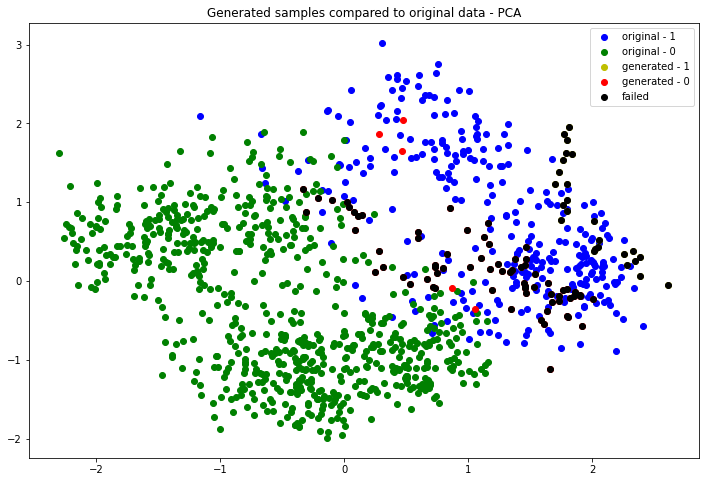

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Generated samples compared to original data - PCA')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

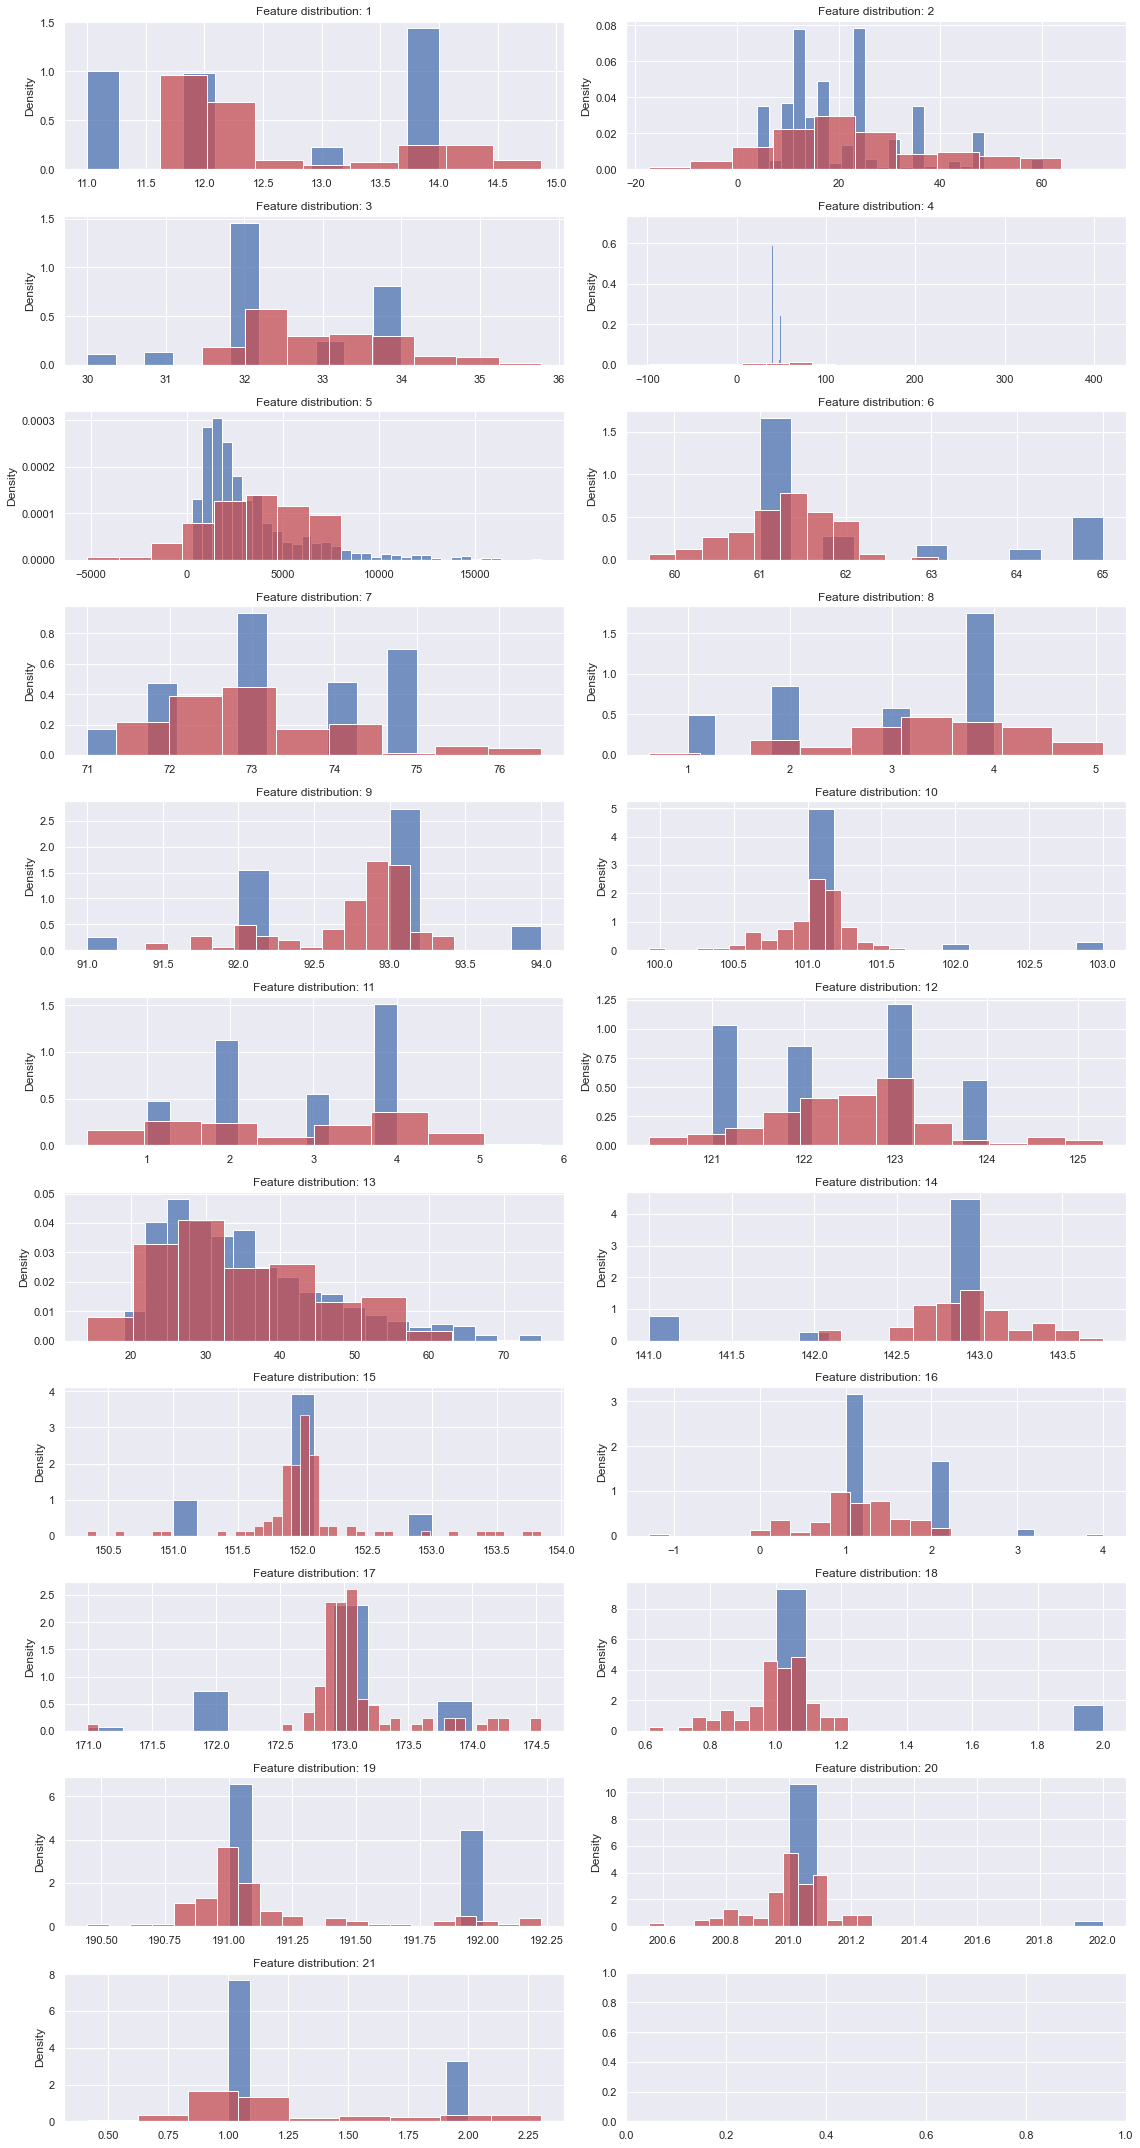

In [27]:
import seaborn as sns, numpy as np

sns.set_theme(); np.random.seed(0)

def plot_feature_dist(df, gen):
    fig, ax = plt.subplots(int(np.ceil(df.shape[1]/2)), 2, figsize=(16, 30))
    for column in range(df.shape[1]):
        ax[column // 2, column % 2].set_title(f'Feature distribution: {column + 1}')
        sns.histplot(df[:, column], label='Original', stat='density', ax=ax[column // 2, column % 2], color='b')
        sns.histplot(gen[:, column], label='Generated', stat='density', ax=ax[column // 2, column % 2], color='r')
    fig.tight_layout()
    plt.savefig('german_credit.png')
plot_feature_dist(scaler.inverse_transform(df.values), scaler.inverse_transform(g_z))